In [ ]:
import tensorflow as tf
# import keras

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers

In [108]:
model = models.Sequential()

In [109]:
# model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
# # model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [92]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_labels.shape

(60000,)

In [56]:
train_labels[0].shape

()

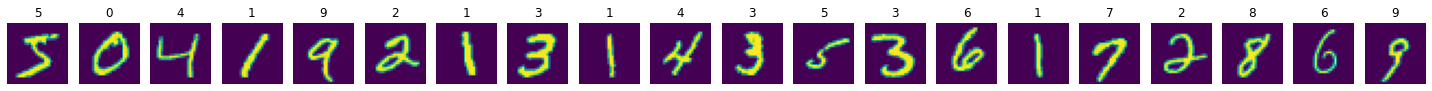

In [9]:
# imgs,labels = next(train_data,train_labels)

train_samples = list(zip(train_data,train_labels))

import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows = 1, ncols = 20,figsize = (20,7))

for ax,(image,label) in zip(ax, train_samples):
    ax.imshow(image)
#     ax.set_title('label',label)
    ax.set_title("%s"%label)
    ax.set_axis_off()
    plt.tight_layout()
    


In [93]:
# train_data = train_data.reshape((60000,28,28,1))
# train_data = train_data.astype('float32')/255

# test_data = test_data.reshape((10000,28,28,1))
# test_data = test_data.astype('float32')/255

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [91]:
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [83]:
train_labels.shape

(60000, 10)

In [73]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import categorical_crossentropy

In [113]:
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [95]:
train_data[0].shape

(28, 28, 1)

In [115]:
# model.fit(train_data, train_labels, epochs=5, batch_size=50)
model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_split = 0.2, verbose = 2)

Epoch 1/5
750/750 [==============================] - 59s 78ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0184 - val_accuracy: 0.9952
Epoch 2/5
750/750 [==============================] - 59s 78ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0214 - val_accuracy: 0.9934
Epoch 3/5
750/750 [==============================] - 59s 79ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0222 - val_accuracy: 0.9941
Epoch 4/5
750/750 [==============================] - 56s 75ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0252 - val_accuracy: 0.9947
Epoch 5/5
750/750 [==============================] - 56s 75ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0258 - val_accuracy: 0.9952


In [121]:
import pandas as pd
df = pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.015290,0.995146,0.018426,0.995250
1,0.011975,0.996229,0.021378,0.993417
2,0.010364,0.996938,0.022207,0.994083
3,0.008350,0.997604,0.025196,0.994667
4,0.007154,0.997875,0.025793,0.995167


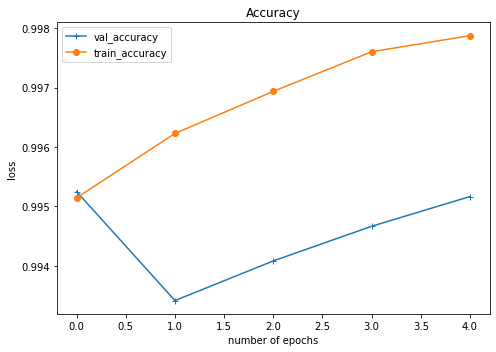

In [164]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
ax.plot(np.arange(5), 'val_accuracy', data = df, label = 'val_accuracy', marker = '+')
ax.plot(np.arange(5), 'accuracy',data = df,label = 'train_accuracy', marker = 'o')
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

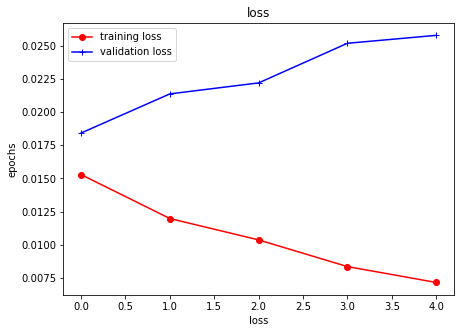

In [166]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
ax.plot(np.arange(5), 'loss', data = df, color = 'r', marker = 'o', label = 'training loss')
ax.plot(np.arange(5), 'val_loss', data = df, color = 'b', marker = '+', label = 'validation loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.title('loss')
plt.legend()
plt.show()

In [167]:
predictions = model.predict(test_images)

In [213]:
pred = []

for i in np.arange(len(predictions)):
    pred.append(np.argmax(predictions[i]))
    

In [214]:
pred = np.array(pred)

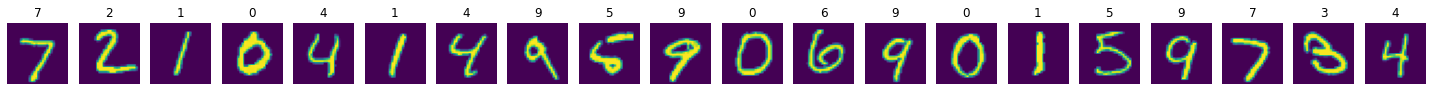

In [215]:
fig,ax = plt.subplots(nrows = 1, ncols = 20,figsize = (20,7))
predicted_labels = list(zip(test_images,pred))
for (image,label),ax in zip(predicted_labels,ax):
    ax.imshow(image)
    ax.set_title("%s"%label)
    ax.set_axis_off()
    plt.tight_layout()
plt.show()

In [216]:
model.evaluate(test_images, predictions)

313/313 [==============================] - 29s 49ms/step - loss: 0.0074 - accuracy: 1.0000


[0.007426743395626545, 1.0]